In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt

import data
from models import random_forest_pcc
from modules.experiments import ActiveLearningExperiment, error, hamming_loss, NegLogLikelihoodEvaluator
from plotting import plot_active_learning_phase_diagrams, plot_joint_active_learning_phase_diagrams

x = data.x
y = data.y.filter(['sphere', 'worm', 'vesicle', 'other'], axis=1).replace(-1, 0)

## HPMA / CysMA

In [2]:
query1 = (data.x['core_HPMA'] == 1) & (data.x['corona_CysMA'] == 1)
x[query1][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
199,50,10.0,31,0.0,7.0,1,70
200,100,10.0,31,0.0,7.0,1,70
201,150,10.0,31,0.0,7.0,1,70
202,200,10.0,31,0.0,7.0,1,70
203,250,10.0,31,0.0,7.0,1,70
204,300,10.0,31,0.0,7.0,1,70
205,100,15.0,31,0.0,7.0,1,70
206,125,15.0,31,0.0,7.0,1,70
207,150,15.0,31,0.0,7.0,1,70
208,175,15.0,31,0.0,7.0,1,70


In [3]:
exp1 = ActiveLearningExperiment(random_forest_pcc, x[~query1], x[query1], y[~query1], y[query1], 21, evaluators=[hamming_loss, error])
exp1.run()

.....................


In [4]:
from pandas import Index

cols = {'a', 'b'}
rows = [{'a' : 0,
       'b' : 1}]
df = pd.DataFrame(columns=cols)
df.index.name = 'round'
pd.concat((df, pd.DataFrame(rows, index=Index([0], name='round')) )) #, index=Index([0], name='round'))))
# pd.DataFrame(rows, columns=cols)



,a,b
round,,
0,0,1


In [5]:
exp1.results_

,round,train_hamming loss,test_hamming loss,train_error,test_error,full_test_hamming loss,full_test_error
0,0,0.0,0.420455,0.0,0.772727,0.420455,0.772727
1,1,0.0,0.309524,0.0,0.619048,0.295455,0.590909
2,2,0.0,0.237500,0.0,0.550000,0.215909,0.500000
3,3,0.0,0.118421,0.0,0.315789,0.102273,0.272727
4,4,0.0,0.125000,0.0,0.333333,0.102273,0.272727
5,5,0.0,0.073529,0.0,0.235294,0.056818,0.181818
6,6,0.0,0.078125,0.0,0.250000,0.056818,0.181818
7,7,0.0,0.050000,0.0,0.200000,0.034091,0.136364
8,8,0.0,0.017857,0.0,0.071429,0.011364,0.045455
9,9,0.0,0.019231,0.0,0.076923,0.011364,0.045455


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


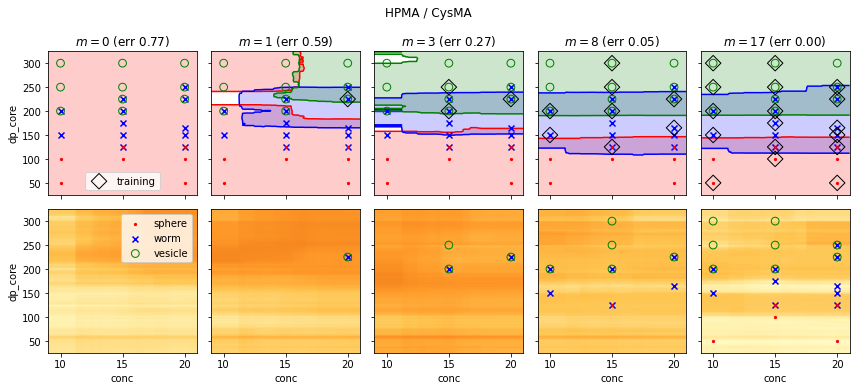

In [6]:
plot_active_learning_phase_diagrams(exp1, [0, 1, 3, 8, 17])
plt.suptitle('HPMA / CysMA')
from common import OUTPUTPATH
plt.savefig(os.path.join(OUTPUTPATH, 'HPMA_CysMA.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()

## MEMA / GMA

In [7]:
query2 = (data.x.core_MEMA == 1) & (data.x.corona_GMA == 1)
x[query2][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
424,30,10.0,29,0.0,3.5,0,70
425,35,10.0,29,0.0,3.5,0,70
426,38,10.0,29,0.0,3.5,0,70
427,43,10.0,29,0.0,3.5,0,70
428,58,10.0,29,0.0,3.5,0,70
429,70,10.0,29,0.0,3.5,0,70
430,74,10.0,29,0.0,3.5,0,70
431,78,10.0,29,0.0,3.5,0,70
432,84,10.0,29,0.0,3.5,0,70
433,89,10.0,29,0.0,3.5,0,70


In [8]:
exp2 = ActiveLearningExperiment(random_forest_pcc, x[~query2], x[query2], y[~query2], y[query2], 25)
exp2.run()

.........................


In [9]:
exp2.results_

,round,train_error,test_error,full_test_error
0,0,0.0,0.730769,0.730769
1,1,0.0,0.720000,0.692308
2,2,0.0,0.875000,0.807692
3,3,0.0,0.956522,0.846154
4,4,0.0,0.727273,0.615385
5,5,0.0,0.619048,0.500000
6,6,0.0,0.450000,0.346154
7,7,0.0,0.368421,0.269231
8,8,0.0,0.166667,0.115385
9,9,0.0,0.176471,0.115385


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


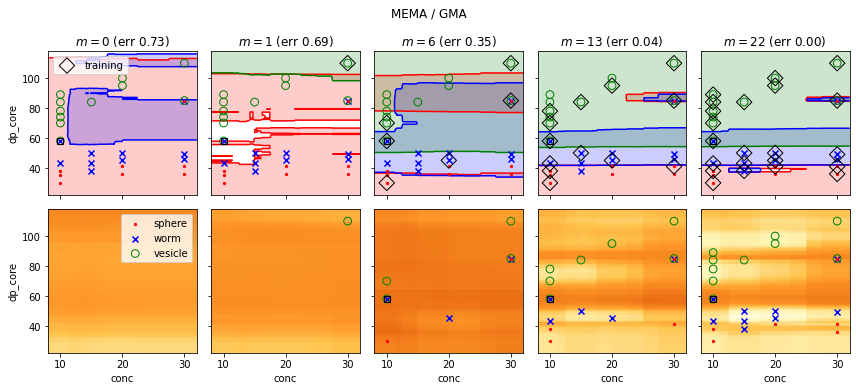

In [10]:
plot_active_learning_phase_diagrams(exp2, [0, 1, 6, 13, 22])
plt.suptitle('MEMA / GMA')
plt.savefig(os.path.join(OUTPUTPATH, 'MEMA_GMA.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()

## HPMA / GMA

In [11]:
query3 = (data.x.core_HPMA == 1) & (data.x.corona_GMA == 1) & (data.x.dp_corona==78) & (data.x.salt==0) & (data.x.ph==7) & (data.x.charged==0) & (data.x.temp==70)
sum(query3), sum(~query3)

(44, 548)

In [12]:
exp3 = ActiveLearningExperiment(random_forest_pcc, x[~query3], x[query3], y[~query3], y[query3], 43)
exp3.run()

...........................................


In [13]:
exp3.results_

,round,train_error,test_error,full_test_error
0,0,0.0,0.772727,0.772727
1,1,0.0,0.697674,0.681818
2,2,0.0,0.642857,0.613636
3,3,0.0,0.658537,0.613636
4,4,0.0,0.650000,0.590909
5,5,0.0,0.615385,0.545455
6,6,0.0,0.578947,0.500000
7,7,0.0,0.540541,0.454545
8,8,0.0,0.444444,0.363636
9,9,0.0,0.571429,0.454545


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


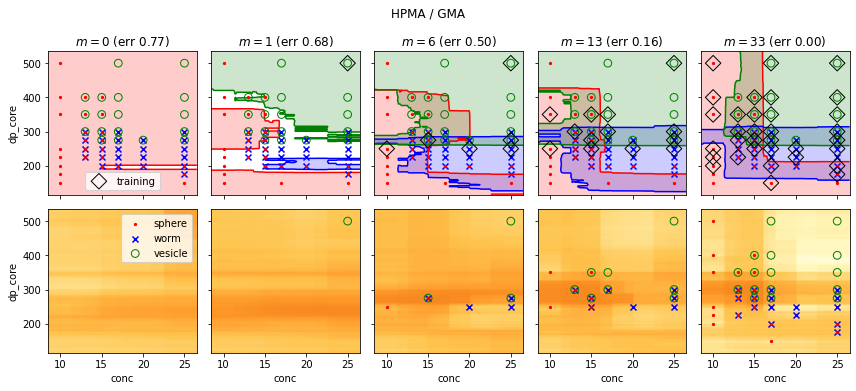

In [14]:
plot_active_learning_phase_diagrams(exp3, [0, 1, 6, 13, 33])
plt.suptitle('HPMA / GMA')
plt.savefig(os.path.join(OUTPUTPATH, 'HPMA_GMA.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()

/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


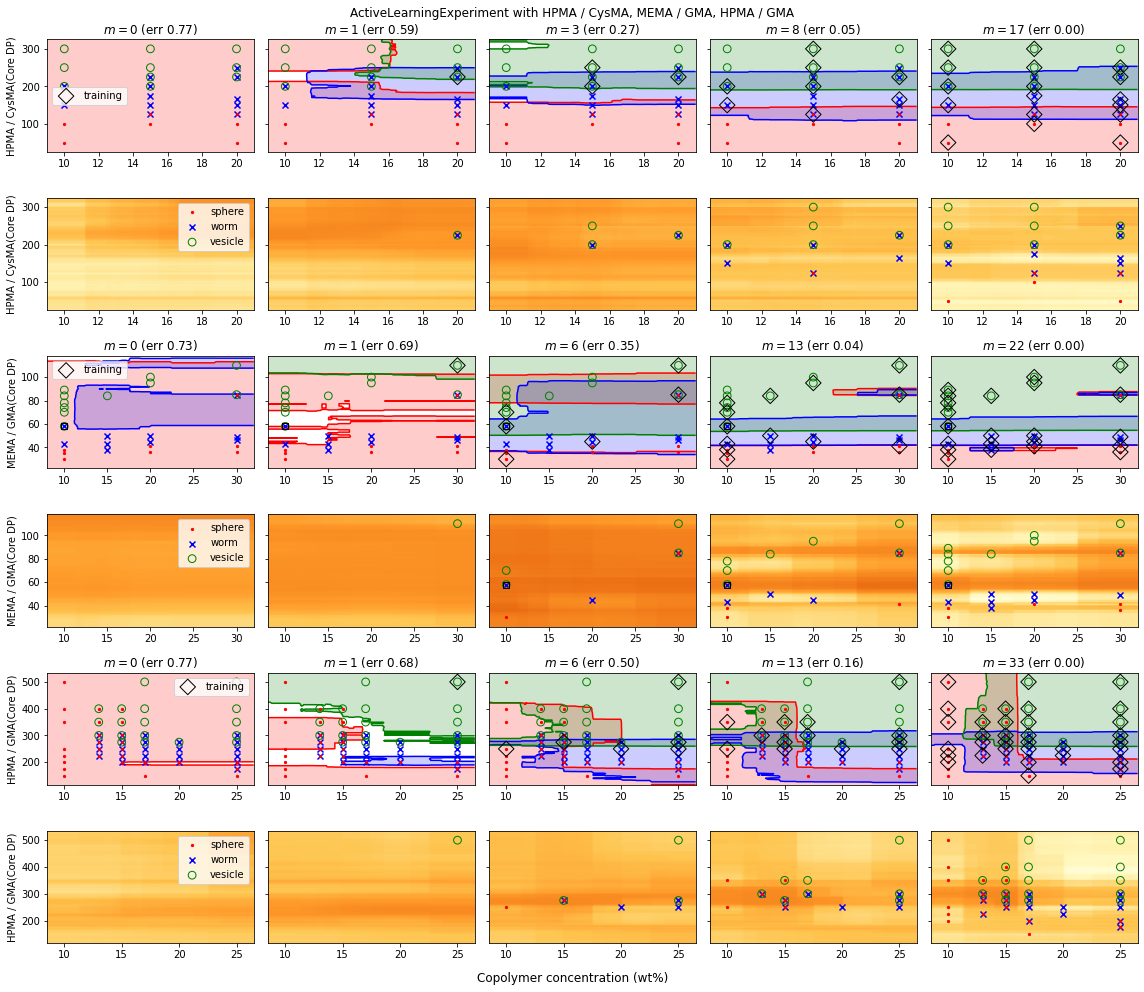

In [20]:
plot_joint_active_learning_phase_diagrams(exp_lst= [exp1, exp2, exp3], y_label_names = ['HPMA / CysMA', 'MEMA / GMA', 'HPMA / GMA'], k_lst=[[0, 1, 3, 8, 17],[0, 1, 6, 13, 22], [0, 1, 6, 13, 33]], figsize= (16, 14))
plt.suptitle('ActiveLearningExperiment with HPMA / CysMA, MEMA / GMA, HPMA / GMA')
plt.savefig(os.path.join(OUTPUTPATH, 'Activelearining_combine.pdf'), bbox_inches='tight', pad_inches=0)


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


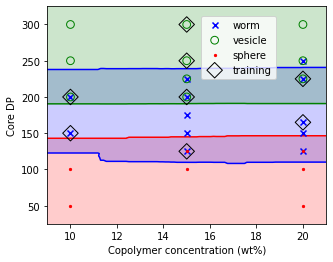

In [ ]:
from plotting import x_grid_data_around_sample, plot_marginal_morphology_contours, scatter_phases, SCATTER_STYLE_TRAINING
from common import OUTPUTPATH
import os

plt.figure(figsize=(5, 4))
xx1, xx2, grid_points = x_grid_data_around_sample(exp1.x_test[0], 'conc', 'dp_core', resolution=100)
pp = exp1.fits[8].predict_proba(grid_points)
plot_marginal_morphology_contours(xx1, xx2, pp)
scatter_phases(exp1.y_test[0], exp1.x_test[0]['conc'], exp1.x_test[0]['dp_core'], other=False)
plt.scatter(exp1.x_train[8][-8:]['conc'], exp1.x_train[8][-8:]['dp_core'], **SCATTER_STYLE_TRAINING)
plt.xlabel('Copolymer concentration (wt%)')
plt.ylabel('Core DP')
plt.legend(loc=(0.55, 2/3))
plt.savefig(os.path.join(OUTPUTPATH, 'phases_8_HPMA_CYSMA.pdf'), bbox_inches='tight', pad_inches=0)
# phases_3_GMA_CYSMA
plt.show()


## GlyMA / GMA

In [ ]:
query4 = (data.x.core_GlyMA == 1) & (data.x.corona_GMA == 1)
x[query4][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
311,100,10.0,45,0.0,5.20,0,70
312,100,10.0,45,0.0,7.10,0,70
313,100,10.0,45,0.0,4.50,0,40
314,100,10.0,45,0.0,7.20,0,40
315,100,10.0,45,0.0,4.20,0,50
316,100,10.0,45,0.0,7.10,0,50
317,300,10.0,45,0.0,7.00,0,50
318,400,10.0,45,0.0,7.00,0,50
319,100,10.0,45,0.0,3.00,0,30
327,25,15.0,25,0.0,2.75,0,50


: 

In [ ]:
exp4 = ActiveLearningExperiment(random_forest_pcc, x[~query4], x[query4], y[~query4], y[query4], 12)
exp4.run()

............


: 

/Users/mbol0005/Repositories/PISA_ML/data.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


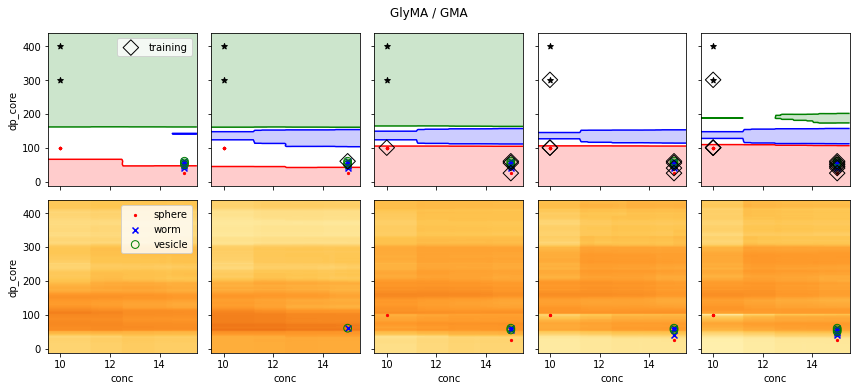

: 

In [ ]:
plot_active_learning_phase_diagrams(exp4)
plt.suptitle('GlyMA / GMA')
plt.show()

## BzMA / GMA

In [ ]:
query5 = (data.x.core_BzMA == 1) & (data.x.corona_GMA == 1)
x[query5][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
555,50,10.0,51,0.0,7.0,0,70
556,75,10.0,51,0.0,7.0,0,70
557,100,10.0,51,0.0,7.0,0,70
558,125,10.0,51,0.0,7.0,0,70
559,150,10.0,51,0.0,7.0,0,70
560,175,10.0,51,0.0,7.0,0,70
561,200,10.0,51,0.0,7.0,0,70
562,250,10.0,51,0.0,7.0,0,70
563,300,10.0,51,0.0,7.0,0,70
564,400,10.0,51,0.0,7.0,0,70


: 

In [ ]:
exp5 = ActiveLearningExperiment(random_forest_pcc, x[~query5], x[query5], y[~query5], y[query5], 12)
exp5.run()


............


: 

/Users/mbol0005/Repositories/PISA_ML/data.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


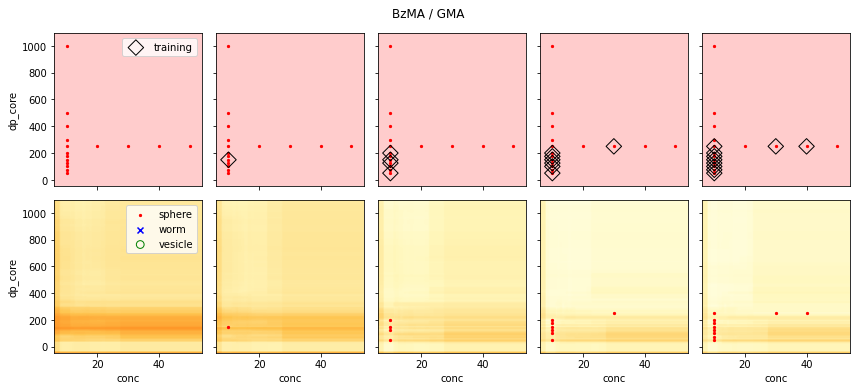

: 

In [ ]:
plot_active_learning_phase_diagrams(exp5)
plt.suptitle('BzMA / GMA')
plt.show()